In [1]:
from typing import List, Tuple
import random
import matplotlib.pyplot as plt
from NeuralNetwork import NeuralNetwork, NeuronLayer
from Neuron import Neuron
from Network import Network

### Some functions that will make life easier

In [2]:
def mse(predictions: List[float], targets: List[float]) -> float:
    """Calculates the Mean Squared Error over a set of predictions and targets"""
    return sum([(d-y)**2 for d, y in zip(targets, predictions)]) / len(targets)

In [3]:
def create_nn(shape: List[int]) -> NeuralNetwork:
    return NeuralNetwork([
        NeuronLayer([
            Neuron([random.normalvariate(0, 1) for _ in range(shape[i-1])], random.normalvariate(0, 1))
            for _ in range(shape[i])
        ])
        for i in range(1, len(shape))
    ])

## AND gate
### Creating dataset

In [4]:
X_and = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
Y_and = [
    [0], 
    [0], 
    [0], 
    [1]
]

### Creating the model and training

In [5]:
and_nn = create_nn(shape=[2, 1])
and_nn.train(X_and, Y_and, epochs=10000, learning_rate=0.05)

Done training, 10000 epochs done.


### Scoring

In [6]:
mse([and_nn.feed_forward(inp)[0] for inp in X_and], [i[0] for i in Y_and])

0.005650375935820368

Dat is geen slechte score al zeg ik het zelf.  
En als laatst hieronder een plaatje van het model op input [1, 1]

In [7]:
and_nn.to_svg(X_and[3])

## XOR gate
### Creating dataset

In [8]:
X_xor = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
Y_xor = [
    [0], 
    [1], 
    [1], 
    [0]
]

### Creating the model and training

In [9]:
xor_nn = create_nn(shape=[2, 2, 1])
xor_nn.train(X_xor, Y_xor, epochs=50000, learning_rate=0.05)

Done training, 50000 epochs done.


### Scoring

In [10]:
mse([xor_nn.feed_forward(inp)[0] for inp in X_xor], [i[0] for i in Y_xor])

0.0006312824924433771

Yess, dat lijkt ook te werken.
En hieronder weer een plaatje van het model:

In [11]:
xor_nn.to_svg(X_xor[1])

## Half Adder
### Creating dataset

In [12]:
X_ha = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
Y_ha = [
    [0, 0], 
    [1, 0], 
    [1, 0], 
    [0, 1]
]

### Creating the model and training

In [13]:
ha_nn = create_nn(shape=[2, 2, 2])
ha_nn.train(X_ha, Y_ha, epochs=50000, learning_rate=0.05)

Done training, 50000 epochs done.


### Scoring
Een score hieraan geven gaat natuurlijk iets anders omdat er meerdere outputs zijn.

In [14]:
print(mse([ha_nn.feed_forward(inp)[0] for inp in X_ha], [i[0] for i in Y_ha]))
print(mse([ha_nn.feed_forward(inp)[1] for inp in X_ha], [i[1] for i in Y_ha]))

0.0006762062774889006
0.0002775403882096623


Ik wilde het eerst bij elkaar optellen, maar ik denk dat dit meer informatie geeft.  
Ik vind de scores best netjes

In [15]:
ha_nn.to_svg(X_ha[0])

### More functions
Deze functies gaan het makkelijker bij de iris en digits datasets

In [16]:
def to_one_hot_vector(i: int, vector_length: int) -> List:
    """
    Converts the given integer to a one-hot encoded vector.
    Needs the maximum possible integer as `vector_length` to determine the length of the one-hot vector
    """
    vec = [0]*vector_length
    vec[i] = 1
    return vec

def shuffle_dataset(X: List, Y: List) -> Tuple[List, List]:
    """Shuffles the features and targets together"""
    temp = list(zip(X, Y))
    random.shuffle(temp)
    return tuple(zip(*temp))

def train_test_split(X: List, Y: List, test_size: float = 0.25) -> Tuple[List, List, List, List]:
    shuffled_X, shuffled_Y = shuffle_dataset(X, Y)
    split_index = int(len(shuffled_X) * test_size)
    return shuffled_X[:split_index], shuffled_X[split_index:], shuffled_Y[:split_index], shuffled_Y[split_index:]

def create_normalize_function(data: List[List[float]]):
    """
    Creates a function that normalizes a input-point between 0.0 and 1.0,
    uses the given dataset to determin the min and the max.
    The returned function can/needs to be applied when you want to use new data.
    """
    vector_length = len(data[0])
    mins = [min([point[i] for point in data]) for i in range(vector_length)]
    maxs = [max([point[i] for point in data]) for i in range(vector_length)]
    return lambda point: [(point[i]-mins[i]) / (maxs[i]-mins[i]) for i in range(vector_length)]

def accuracy(X: List[List[float]], Y: List[List[float]], model: Network) -> float:
    """Tests the given classifier-model's accuracy"""
    correctly_classified = 0
    for inputs, target in zip(X, Y):
        predicted = model.feed_forward(inputs)
        pred_index = predicted.index(max(predicted))
        correctly_classified += target[pred_index]
    return correctly_classified / len(X)

### Importing / transforming dataset

In [17]:
from sklearn import datasets
iris = datasets.load_iris()

In [18]:
norm = create_normalize_function(iris.data)
X_iris = list(map(norm, iris.data))
Y_iris = [to_one_hot_vector(i, 3) for i in iris.target]
X_iris_train, X_iris_test, Y_iris_train, Y_iris_test = train_test_split(X_iris, Y_iris)

### Creating the model and training

In [19]:
iris_nn = create_nn(shape=[4, 2, 3, 3])
iris_nn.train(X_iris_train, Y_iris_train, epochs=5000, learning_rate=0.05)

Done training, 5000 epochs done.


### Accuracy scoring

In [20]:
print(
    f"train accuracy: {accuracy(X_iris_train, Y_iris_train, iris_nn) * 100}%\n"
    f"test  accuracy: {accuracy(X_iris_test, Y_iris_test, iris_nn) * 100}%"
)

train accuracy: 100.0%
test  accuracy: 97.34513274336283%


Not bad, not bad at all

In [21]:
iris_nn.to_svg(X_iris[2])

## Digits

In [22]:
digits = datasets.load_digits()

Eventjes de vorm van de input en de target bekijken

input = [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
target = 0
Visualized input:


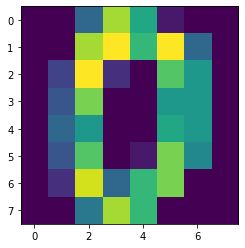

In [23]:
print(f"input = {digits.data[0]}")
print(f"target = {digits.target[0]}")
print("Visualized input:")
plt.imshow(digits.images[0])
plt.show()

### Transforming dataset
Hier normalizeren we de inputs zodat het tussen 0.0 en 1.0 komt te liggen,  
en zetten we de categoriën om in one-hot vectoren

In [24]:
X_digits = [list(x/16) for x in digits.data]
Y_digits = [to_one_hot_vector(i, 10) for i in digits.target]
X_digits_train, X_digits_test, Y_digits_train, Y_digits_test = train_test_split(X_digits, Y_digits)

### Creating the model and training

In [25]:
digits_nn = create_nn(shape=[64, 20, 10])
digits_nn.train(X_digits_train, Y_digits_train, epochs=80, learning_rate=0.05)

Done training, 80 epochs done.


### Accuracy scoring

In [26]:
print(
    f"train accuracy: {accuracy(X_digits_train, Y_digits_train, digits_nn) * 100}%\n"
    f"test  accuracy: {accuracy(X_digits_test, Y_digits_test, digits_nn) * 100}%"
)

train accuracy: 98.21826280623608%
test  accuracy: 93.69436201780415%


Dat is zeker niet slecht.

In [27]:
digits_nn.to_svg(X_digits[0], radius=6, height=900, width=1000)

![Huge gif](https://media.giphy.com/media/vwF2MCJiQk1kKgnS7l/giphy.gif)

Ja dit was te verwachten,  
vanaf dit soort groottes heeft die visualisatie niet heel veel zin meer